<a href="https://colab.research.google.com/github/suflorcita/GIA/blob/main/S_gia_ej6_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

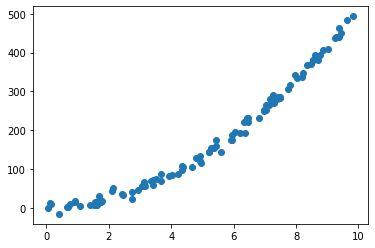

In [ ]:
#genero de manera determinística los datos
x = np.random.uniform(low=0,high=10.0,size=100)
# print(x)

y = 2.0 + 1.5 *x + 5.0 *(x**2) + np.random.normal(loc=0.0,scale=10.0, size=100)
plt.scatter(x,y)

### Criterio: Cross-validation (K-Fold)

In [ ]:
# particiones del k-fold
n = len(x)

k = 5  #si k = n entonces es LLOCV : Leave One Out Cross Validation

fold_size = n // k  #división entera, trunca, no redondea, no devuelve un float sino un entero
# print('n:',n)
# print('fold_size:',fold_size)

urna = range(n)  #n bolillas para luego extraer  (0..99)
# print(list(urna))

folds = []

for i in range (k-1):  #el último queda definido, no es necesario una vuelta más (i = 0, 1, 2, 3)
    fold = np.random.choice(urna,size=fold_size,replace=False)
    folds.append(fold)
    urna = np.setdiff1d(urna,fold) #al conjunto urna, le resta fold

folds.append(urna)  #le appendeo el remanente, lo que quedó de la urna
print('folds:',folds)    

folds: [array([ 5, 46, 25, 36, 19, 31, 34, 83, 56, 24, 60, 95, 22, 57, 17, 69, 35,
       67, 30, 11]), array([75, 78, 87, 43, 45, 47, 97, 28,  6, 61, 50,  8, 53, 71, 37, 94, 29,
       84, 68, 15]), array([55, 85, 41, 82, 10,  1,  7, 26,  4, 93, 62,  2, 90, 32,  9, 74, 73,
       58, 77, 89]), array([44, 66, 86, 79, 81,  0, 64, 72, 65, 21, 54, 27, 91, 33, 59, 20, 48,
       99, 98, 80]), array([ 3, 12, 13, 14, 16, 18, 23, 38, 39, 40, 42, 49, 51, 52, 63, 70, 76,
       88, 92, 96])]


In [ ]:
# analizamos el modelo lineal simple:  y = b0 + b1.x 
error_1 = 0.0 
urna =  range (n)

x = x.reshape(-1,1)  #lo volvemos columna
y = y.reshape(-1,1)

for i in range(k):  # i = 0,1,2,3,4
    
    #determino los índices
    valid_index = folds[i]
    train_index = np.setdiff1d(urna,valid_index)
    
    #separo los datos train y valid
    x_train = x[train_index]
    y_train = y[train_index]
    
    x_valid = x[valid_index]       
    y_valid = y[valid_index]
    
    #hago la regresión con el conjunto de training
    model = LinearRegression()
    model.fit(x_train,y_train)
    
    #ahora evaluo el modelo con el conjunto de validación
    y_pred = model.predict(x_valid)
    
    error_1 += np.mean((y_valid - y_pred)**2) #sumo el MSE obtenido en cada ciclo, y obtengo el MSE total

print('MSE modelo1:',error_1)

MSE modelo1: 6636.746271642163


In [ ]:
## Modelo cuadrático: y = b0 + b1.x + b2.x^2
error_2 = 0.0 
urna =  range (n)

for i in range(k):
    #determino los índices
    valid_index = folds[i]
    train_index = np.setdiff1d(urna,valid_index)
    
    #separo los datos train y valid
    x_train = x[train_index]
    y_train = y[train_index]
    
    x_valid = x[valid_index]       
    y_valid = y[valid_index]
    
    #armo las matrices de diseño para ambos conjuntos de datos
    X_train = np.concatenate([x_train,x_train**2],axis=1)
    X_valid =  np.concatenate([x_valid,x_valid**2],axis=1)
    
    #hago la regresión con el conjunto de training
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    #ahora evaluo el modelo con el conjunto de validación
    y_pred = model.predict(X_valid)
    error_2 += np.mean((y_valid - y_pred)**2)  #mse, sumo el MSE de cada fold para obtener el MSE total

print('MSE modelo2:',error_2)

MSE modelo2: 409.2134746089634


In [ ]:
## Modelo cúbico y = b0 + b1.x + b2.x^2 + b3.x^3
error_3 = 0.0 

urna =  range (n)

for i in range(k):
    #determino los índices
    valid_index = folds[i]
    train_index = np.setdiff1d(urna,valid_index)
    
    #separo los datos train y valid
    x_train = x[train_index]
    y_train = y[train_index]
    
    x_valid = x[valid_index]       
    y_valid = y[valid_index]
    
    #armo las matrices de diseño para ambos conjuntos de datos
    X_train = np.concatenate([x_train,x_train**2,x_train**3],axis=1)
    X_valid = np.concatenate([x_valid,x_valid**2,x_valid**3],axis=1)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_valid)
    error_3 += np.mean((y_valid - y_pred)**2)

print('MSE modelo3:',error_3)

MSE modelo3: 420.26238816307364
